<a href="https://colab.research.google.com/github/DakePeng/AICognition/blob/main/DataSquad_OnboardingTutorial_Wb24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataSquad-OnboardingTutorial-Wb24



## Before You Get Started
* **Make a copy of this file in your personal cloud storage to play around with it!**

* Make sure you have access to the workspaces on our onboarding checklist

* Make sure you are reading through the [DataSquad Handbook](https://docs.google.com/document/d/1wlG-1ZbCAb7lUcBR8QxiBkO4jXSTLmqUYnDBWg28IDw/edit?tab=t.0#heading=h.nq8qd4hu9gjp)

* Make sure you are reading through our [GitHub Project Workflow](https://github.com/carleton/datasquad/blob/Github-Project-Workflow/DataSquad%20GitHub%20Workflow%20Final.md?plain=1) and understood the management process


## Introduction

Welcome to the DataSquad! This tutorial tries to demonstrate some of the **things that we do** for our clients to prepare you for your work. It also tries to demonstrate some of the **basic coding formats and principles** that we use. Please read through the following cells carefully and run them **by clicking through the play buttons 1 by 1**! As we always encourage, **use the comment feature (the little speech bubble icon on the top right of each cell) to indicate points of confusion or potential improvement** as you go! This will help us make this process easier for future members.

In this document, notice 3 different types of cells:


An ordinary text cell like this one provides introduction or explanations to the demo.

> An indented cell (a "block quote") like this one shows some important practices we adopt at the DataSquad or tips to situations that we frequently encounter at work.



In [ ]:
print("A code cell like this one (with a little play button on the top left) allows you to run or write some demonstrative code in Python.")

A code cell like this one (with a little play button on the top left) allows you to run or write some demonstrative code in Python.


### Example Code Header


In [ ]:
# Code for DataSquad-OnboardingTutorial-Wb24
# Author: Dake Peng'25
# Last Successfully Run: 12/16/2024
# Introductory code for new DataSquad members. Includes 3 demos:
#   "Data Wrangling: Index your own Google Drive!" walks you through how
# to index their "my drive" in Google Cloud storage and converting the
# results to a clean, readable format
#   "Data Carpentry: Merge 2 Different Spreadsheets" introduces the process
# of merging two spreadsheets based on the same column.
#   "Data Visualization: Analyze Test Scores Over Time" gives an example of
#   visualizing and analyzing a time series data, as well as making some statistical
#   claims about it.
# TO RUN THESE FUNCTIONS:
#   Click through the "play" buttons in each cell.




> A very important part of our job is to document (which includes naming, signing, and recording the way to use) our projects. We tend to add our **name** and **date last successfully run** on the top of our code as a comment.

> In addition, the header should include **a description of the code** and **how to run it**. If the process is too complicated or if there are multiple pieces of code in the repository, these instructions should go in a README file.







> At the DataSquad, each project follows a unique naming scheme so that we can idenfify it across different workspaces and platforms. We call this name the **ProjectID**.

> **ProjectIDs** are generated with the following scheme: [Client Name]-[Project Name]-[Time]. For example, if our client Carly Born is requesting a project called GoogleDriveUsageAnalysis during fall term 2024, the project should be named "CBorn-GoogleDriveUsageAnalysis-F24".
- [Client Name] is formatted using the client's first initial concatenated with their last name. For example: Barbara Allen will be "BAllen". If the client is an organization, that full organization name can also be used.
- [Project Name] is a short name for the project that dose not contain special characters or spaces. Camel case is advised for longer names. For example: "ElectionNews" or "CarletonFileKeeper".
- [Time] is the year (2 digits) when the project started concatenated with the semester in the year. The semesters are represented with encodings specified below. For example: "24FA" or "23Sb".
  - Spring Break: "Sb"
  - Spring Term: "SP"
  - Summer Break: "Su"
  - Fall Term: "FA"
  - Winter Break: "Wb"
  - Winter Term: "WI"


### Things We Do

As you probably have learned in your application process, DataSquad tries to provide help to faculty and staff at and around Carleton College with Data Wrangling, Data Carpentry, Database Design & Development, and Data Visualization. What do those terms mean? In the following sections, we will give you some examples that you can play with on your own.

## Data Wrangling: Index your own Google Drive!

(GenAI content)

Data wrangling refers to the process of transforming and organizing raw data into a more usable and structured format for analysis. This involves cleaning, reshaping, and enriching data to make it suitable for exploration, modeling, or reporting. It is an essential step in the data preparation pipeline for tasks like data analysis, visualization, and machine learning.



**Here is a project that we frequentyly encounter at the DataSquad: indexing files in a clound drive like Google Drive or OneDrive and organizing their metadata (i.e. file name, file size, data of creation...) into a clean format. This section will walk you through how to go about scraping and reshaping the data.**

### Step 1: Setup


#### Import Libraries


This process will allow the code to access your account credentials, thereby accessing the files and metadata that you have access to. Make sure you give it all credentials when you run it. If you feel insecure, check the following code and see what it's doing! The credentials are used in these code snippets only.

In [ ]:
from google.colab import drive
import os
import pandas as pd
# uncomment this line to restart the mounting
# drive.flush_and_unmount()
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


#### Define Global Variables

In [ ]:
# Change this to the folder you would like to index
root_folder_path = '/content/drive/MyDrive/'
output_file_path = '/content/drive/MyDrive/file_index.csv'



> It's always a nice feature to define globlal variables that the users can tune without getting deep into the code




### Step 2: Define functions


* Always modularize your functions for readability and reusability.

* Try to keep your functions small and operating on 1 single level of abstraction.

> For example, if we want to subtract elements in a list by 1 and sort the list, the best practice would be to do this in 2 functions: *subtract_by_one()*, and *sort_list()*. Of course, in actual coding would not do this for actions as simple as this --- but definitely do it when the functions are more complicated.

* Try to name your function and variables explicitly, clearly, and concisely, very short/concatenated names are not a plus for good coding

In [ ]:
def index_google_drive(root_folder_path):
  """
  Indexes files in a Google Drive folder and its subfolders,
  collecting metadata into a pandas DataFrame. Generated with
  the help of Google Gemini.

  Args:
      root_folder_path (string): The path to the root folder in Google Drive.

  Returns:
      pd.dataframe: file metadata, or None if an error occurs.
  """
  file_metadata = []
  for dirpath, dirnames, filenames in os.walk(root_folder_path):
    # os.walk() is a function that generates an interator in a
    # Depth First Search (look this up!) order in the folder that you select.
    for filename in filenames:
      filepath = os.path.join(dirpath, filename)
      file_stats = os.stat(filepath)
      file_info = {
        'File Name': filename,
        'File Path': filepath,
        'File Size (bytes)': file_stats.st_size,
        'Last Modified': file_stats.st_mtime,
        'Created': file_stats.st_ctime,
        }
      file_metadata.append(file_info)
  return pd.DataFrame(file_metadata)



> See the annotation after the 1st line. It's the best practice to use [docstring annotations](https://www.geeksforgeeks.org/python-docstrings), specitying the type and definition of each input and output variables.


> We encourage the use of GenAI at work to improve efficiency, but make sure you are understanding all the code and give credit to it in the header.



> I use snake\_case (i.e. lower case words separated by underscores "_") for naming my functions, I think it is the most common practice for Python. You can also adopt camelCase or other schema if you'd like. Just **keep it consistent throughout.**





In [ ]:
def format_dataframe_datetime(df_file_index):
  """
  Formats the datetime columns of the index dataframe to a readable format.

  Args:
      df_file_index (pd.dataframe): file metadata
  Returns:
      pd.dataframe: file metadata with formatted datetime columns
  """
  df_file_index['Last Modified'] = df_file_index['Last Modified'].apply(lambda x: pd.to_datetime(x, unit='s'))
  df_file_index['Created'] = df_file_index['Created'].apply(lambda x: pd.to_datetime(x, unit='s'))
  return df_file_index

> See that this function is **on the same level of abstraction** as index_google_drive(). Another way to keep functions at the same level of abstraction is to write a function for each field (i.e. "File Name", "File Path", ...) and call all of them in index_google_drive(). In that case, the function for "Last Modified" can include a format conversion.

In [ ]:
def print_indices(df_file_index, output_file_path, to_csv = False):
  """
  Prints the elements of a dataframe containing the indices to a csv file

  Args:
      df_file_index (pd.dataframe): file metadata
      output_file_path (string): the path to the csv file
      to_csv (boolean): whether to generate a csv file

  Returns:
      None
  """
  if df_file_index is not None:
    print("Sample File Index:")
    print(df_file_index.head()) # show the first few lines
    if to_csv:
      # generates a csv in your drive with the indices
      df_file_index.to_csv(output_file_path, index = False)
      print(f"\nData saved to {output_file_path}.")

### Step 3: Use a main function to run your functions

In [ ]:
file_index = index_google_drive(root_folder_path)
file_index = format_dataframe_datetime(file_index)
print_indices(file_index, output_file_path, to_csv = True)



> You would enclose these function calls in main() when you are coding locally. This is a Google Colab quirk.


Now check your mydrive for a file called "file_index.csv", you should be able to see something like this: 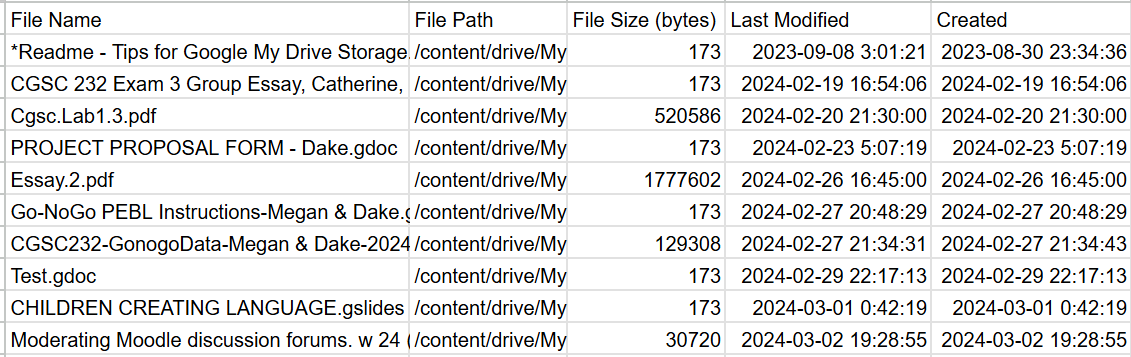

### Step 4: Make Your Own Extensions

Try the following extensions:

* Try to build a directory tree using the os.walk() function. Print your dataframe like this:
  - Mother Folder Name
      - Child Folder Name
          - File1
          - File2
          
You can print it as text like this, or use new columns in the csv to indicate embedded structures. Try to make these fields more readable in the output.

* Try to access more fields in the file metadata. Some intersting ones may include:
  - Mime Type
  - File ID (Look this up)
  - isTrashed?


* Download all Google Doc files in your drive! Make a log of what files have been downloaded, and what errors occurred during the process.

Depending on how comfortable you are with programming/Python, you can use as much GenAI as you like! Just make sure you give it credit


### Step 5: Other Resources
We access web drives using the API (Application Programming Interface) that different companies provide. In addition to indexing, you can also download, creat new files, browze account activity... Anything that can be done on a browzer can be done with the API, and more.

Depending on what web service you are using, you may be interested
in the:
* [Google Drive Python API](https://developers.google.com/drive/api/quickstart/python)
* [Dropbox Python API](https://github.com/dropbox/dropbox-sdk-python)
* [OneDrive API](https://learn.microsoft.com/en-us/onedrive/developer/rest-api/getting-started/?view=odsp-graph-online)
* In addition, to query your Google Drive offline (you may want to
do this if you are dealing with a lot of data to make use of your
powerful processor) is also different from doing it here on Google
Colab. It reqires an additional layer of authentication process. To
learn more, check Dake's project
[BAllen-SharedDrivesFileIndexing-24Wb](https://github.com/carleton/datasquad/tree/BAllen-SharedDrivesFileIndexing-24Wb)

Most of these APIs follow the same logic. You would need to
authenticate an object with your credentials, granting it access to
your storage, and then the query the storage with specific
restrictions. You can alwasy use Gen AI to learn more! For example,
try asking ChatGPT this:
* write me Python code that indexes my onedrive storage

Sometimes, you may also want to backup large amounts of data on
your cloud storage. The download option in Google Drive, for example,
fails (or misses items) when the number of files goes beyond ~700.In
these cases you may want to use a tool called RClone. To learn more,
check [Ryan Choi ('26)'s documentation on RClone](https://docs.google.com/document/d/1QFjjg0Z2_8IVxOyCiyx6-6x6tY-kAswbqdejuOT9OkU/edit?tab=t.0).



## Data Carpentry: Merge 2 Different Spreadsheets


On top of Data Wrangling, Data Carpentry is an additional process that involves cleaning, organizing, and preparing raw data so that it is usable for analysis and visualization.



**Here is a common Data Carpentry problem that Squad members have done multiple times: given 2 spreadsheets (or databases) that have 1 or more shared columns, merge them with those columns. List duplicates, empty fields, or other kinds of outliers.**

### Step 0: Demonstration of the probelm

> Generate a test set. This is something that you would need to do frequently at work, as you don't always have direct access to the actual data. As you can see, I did this quickly with GenAI.



In [ ]:
# prompt: generate 2 csv files, each with 4 columns, 2 columns should be common and the other 2 distinct

import pandas as pd
import numpy as np

# Create the first DataFrame
data1 = {'ID': [1, 2, 3, 4, 5],
        'Name': ['Alice', 'Bob', 'N/A', 'David', 'Eve'],
        'Value1': [10, 20, 30, 40, 50],
        'Value2': [100, 200, 300, 400, 500]}
df1 = pd.DataFrame(data1)

# Create the second DataFrame
data2 = {'ID': [3, 4, 5, 6, None],
        'Name': ['Charlie', 'David', 'Eve', 'Frank', 'N/A'],
        'Value3': [0.1, 0.2, 0.3, 0.4, 0.5],
        'Value4': [1000, 2000, 3000, 4000, 5000]}
df2 = pd.DataFrame(data2)


# Save the DataFrames to CSV files
df1.to_csv('merge_csv_1.csv', index=False)
df2.to_csv('merge_csv_2.csv', index=False)



> You can view the generated csv on the left tool bar > the file icon



Let's say we have 2 different csv files like these two attahed to this Colab file:

In [ ]:
import pandas as pd
print("The first spreadsheet:")
print(pd.read_csv('merge_csv_1.csv').to_string(index=False))
print("\n")
print("The second spreadsheet:")
print(pd.read_csv('merge_csv_2.csv').to_string(index=False))

The first spreadsheet:
 ID  Name  Value1  Value2
  1 Alice      10     100
  2   Bob      20     200
  3   NaN      30     300
  4 David      40     400
  5   Eve      50     500


The second spreadsheet:
 ID    Name  Value3  Value4
3.0 Charlie     0.1    1000
4.0   David     0.2    2000
5.0     Eve     0.3    3000
6.0   Frank     0.4    4000
NaN     NaN     0.5    5000


Our task can be stated as the following:
* If two rows share the same ID and Name, they are the same person, otherwise, they should be treated as different individuals.
* If, in file 1, a row is missing ID or Name but those information can be found in file 2, treat them as the same person.
* If a row is missing both ID and Name, discard it and keep a record.
* We would like to merge the two files, listing all individuals with their: ID, Name, Value1, ..., Value 4



A resulting merged csv would look like this:

In [ ]:
sample_result_merged_df = pd.DataFrame({
    'ID': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Value1': [10.0, 20.0, 30.0, 40.0, 50.0, None],
    'Value2': [100.0, 200.0, 300.0, 400.0, 500.0, None],
    'Value3': [None, None, 0.1, 0.2, 0.3, 0.4],
    'Value4': [None, None, 1000.0, 2000.0, 3000.0, 4000.0]
})
sample_result_merged_df

,ID,Name,Value1,Value2,Value3,Value4
0,1.0,Alice,10.0,100.0,NaN,NaN
1,2.0,Bob,20.0,200.0,NaN,NaN
2,3.0,Charlie,30.0,300.0,0.1,1000.0
3,4.0,David,40.0,400.0,0.2,2000.0
4,5.0,Eve,50.0,500.0,0.3,3000.0
5,6.0,Frank,NaN,NaN,0.4,4000.0


### Step 1: Setup & Global Variables


In [ ]:
import pandas as pd

merge_csv_1_path = 'merge_csv_1.csv'
merge_csv_2_path = 'merge_csv_2.csv'

df1 = pd.read_csv(merge_csv_1_path)
df2 = pd.read_csv(merge_csv_2_path)

### Step 2: Define Functions

In [ ]:
# Here is a useful method that you can use with pandas:
merged_df = pd.merge(df1, df2, on=['ID', 'Name'], how='outer')
merged_df

,ID,Name,Value1,Value2,Value3,Value4
0,1.0,Alice,10.0,100.0,NaN,NaN
1,2.0,Bob,20.0,200.0,NaN,NaN
2,3.0,Charlie,30.0,300.0,0.1,1000.0
3,4.0,David,40.0,400.0,0.2,2000.0
4,5.0,Eve,50.0,500.0,0.3,3000.0
5,6.0,Frank,NaN,NaN,0.4,4000.0
6,NaN,NaN,NaN,NaN,0.5,5000.0




> This method essentially does a **join** on the 2 pieces of data. A **join** usually has the following parameters (and more):
* The data files
* The conditions of the join
* The join method

> The "on" function in this method specifies the condition that the join is based on (which is, the columns match each other)

> There are several types of joins that you can do (join methods). For our purposes:
- An Inner Join is like an intersection of sets. If returns only the rows where there is a match in both tables based on the specified condition. If a record in one table does not have a corresponding match in the other table, it will not appear in the result.
- An Outer Join is like a union of sets. It returns all rows from one table, and the matching rows from the second table. If there is no match, the result will contain NULL values for columns from the second table.

You can also look up [left join and right join](https://www.geeksforgeeks.org/difference-between-left-join-and-right-join/).


In [ ]:
def remove_missing_rows(merged_df):
  """
  Written with the help of Google Gemini.
  Remove rows from merged_df where both ID and Name are missing.

  Args:
    merged_df: The merged dataframe.
  Returns:
    pd.dataframe: the updated merged dataframe
    int: the number of rows removed
  """
  missing_both = merged_df[(merged_df['ID'].isnull()) & (merged_df['Name'].isnull())]
  missing_both_index = missing_both.index
  num_missing_both = len(missing_both_index)
  merged_df = merged_df.drop(missing_both_index)
  return merged_df, num_missing_both



> Depending on how important/sensitive the data you are dealing with is, you may want to save the rows that were removed.





> Sometimes isnull() is not enough. You may want to add checks like "== ' ' " or is.empty(), depending on your data type.



In [ ]:
def fill_missing_values(df1, df2):
  """
  Fill NaN values in 'ID' and 'Name' columns in BOTH dataframes
  using data from the other dataframe if possible.

  Args:
    df1 (pd.dataframe)
    df2 (pd.dataframe)

  Returns:
    pd.dataframe: the updated 1st dataframe
    pd.dataframe: the updated 2nd dataframe
  """
  fill_missing_values_helper(df1, df2)
  fill_missing_values_helper(df2, df1)
  return df1, df2

def fill_missing_values_helper(df_1, df_2):
  """
  Fill NaN values in 'ID' and 'Name' columns in the first dataframe
  using data from the second dataframe if possible.

  Args:
    df1 (pd.dataframe)
    df2 (pd.dataframe)

  Returns:
    pd.dataframe: the updated 1st dataframe
    pd.dataframe: the 2nd dataframe as is
  """
  for index, row in df_1.iterrows():
    # fille
    if pd.isnull(row['ID']):
      potential_matches = df_2[(df_2['Name'] == row['Name'])]
      if len(potential_matches) > 0:
        df_1.loc[index, 'ID'] = potential_matches['ID'].iloc[0]
    if pd.isnull(row['Name']):
      potential_matches = df_2[(df_2['ID'] == row['ID'])]
      if len(potential_matches) > 0:
        df_1.loc[index, 'Name'] = potential_matches['Name'].iloc[0]
  return df_1

> When the process gets complicated or often when a recursion is involved, it's nice to use a helper function. Notice that the df_1 and df_2 in the helper function are passed in, so they can be switched over.

> Notice that this is not perfect: what if there are multiple matches, some providing the information to fill the missing field and others not?

> Also, be aware that this is not always necessary: for many datasets the data are clean and all filled. It's always dependent on the task you are working on.




### Step 3: Run the functions

In [ ]:
df1, df2 = fill_missing_values(df1, df2)
merged_df = pd.merge(df1, df2, on=['ID', 'Name'], how='outer')
merged_df, num_missing_both = remove_missing_rows(merged_df)
# Display information about discarded rows
print(f"{num_missing_both} row(s) were discarded because they were missing both ID and Name.\n")
print("Merged Dataframe:")
merged_df

1 row(s) were discarded because they were missing both ID and Name.

Merged Dataframe:


,ID,Name,Value1,Value2,Value3,Value4
0,1.0,Alice,10.0,100.0,NaN,NaN
1,2.0,Bob,20.0,200.0,NaN,NaN
2,3.0,Charlie,30.0,300.0,0.1,1000.0
3,4.0,David,40.0,400.0,0.2,2000.0
4,5.0,Eve,50.0,500.0,0.3,3000.0
5,6.0,Frank,NaN,NaN,0.4,4000.0


In [ ]:
# convert this to a csv
merged_df.to_csv('merged_csv.csv', index=False)

### Step 4: Make Your Own Extensions

Try the following extensions:

* Try to detect and handle duplicates, for example:
  * In the merged data, remove rows if they are identical to another
  * If 2 rows have the same Name and ID but different values, log them with a print statement, including their line number in the merged dataframe

* Think about edge cases! For example:
  * In fill_missing_values, what if there are multiple matches in the other data file that can be used to fill the empty field?
  * What if the value fields share the same name? for example, what if "Value1" is both in csv1 and csv2? Should you rename one or merge them?



Depending on how comfortable you are with programming/Python, you can use as much GenAI as you like! Just make sure you give it credit


### Step 5: Other Resources

Of course, not all cases of data merging should be done in pandas with dataframes. This can be due to several reasons:

* Sometimes the type of the data does not allow you to put it in a sheet format, especially data that deal with space and time and/or categorical variables. In those cases, you might want to try finding a readily available solution, or sometimes devise your own scheme to join data. For example:
  *  [Spatial Join](https://pro.arcgis.com/en/pro-app/latest/tool-reference/analysis/spatial-join.htm) is something you would do if you are working with GIS data. The [Python for Geo Data Analysis](https://pythongis.org/part1/chapter-03/nb/03-temporal-data.html) page is also helpful.
  *  For Temporal Data, you might want to check if time frames overlap with each other, or join 2 timestamps when they are within the same time window. In those cases you might want to use [pandas.merge_asof()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge_asof.html)



* If there is little data and the task is one-time, why bother coding? You can use the ["merge tables"](https://www.ablebits.com/office-addins-blog/excel-merge-tables-matching-columns/) function in excel. Ask GenAI for help!

* Sometimes the data is best read/processed/maintained in another language --- in those cases, look for a library similar to pandas or a function similar to pd.merge()! Searching "joining dataframes in C" can get you pretty far.


## Data Visualization: Analyze Test Scores Over Time

(GenAI content)

Data visualization is the graphical representation of information and data.  By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.  This process is crucial for transforming complex datasets into easily digestible insights, enabling better decision-making and communication of findings. Effective data visualizations can highlight key takeaways, reveal hidden correlations, and facilitate a deeper understanding of the underlying data, making complex information more engaging and accessible to a wider audience.


Although Data Visualization is not a task that comes as frequently as the former 2, we do get these requests once in a while on the DataSquad. **The following section demonstrates how we go about plotting a time series data and doing some comparisons between groups.** Some statistical knowledge may help you understand this better, but I'll try to explain ideas clearly and intuitively.



> In this section, I would like to focus on many different methods to analyze and display the data, so I will not abide to some of the modularization principles above. Please do when writing your actual code, especially if you are on a big project where steamlining your procedures is important.


### Step 0: Description of the Problem

**Let's imagine that there are 3 individuals taking quizes and exams throughout the term, and we would like to compare them with each other. Our task is to learn who is doing better, as well as understand the trends that different individuals are going through.** For example:

In [ ]:
grade_lists = [[62, 69, 61, 72, 78, 63, 77, 74, 71, 71, 76, 79, 65, 80, 72],
 [85, 85, 99, 62, 62, 93, 74, 71, 93, 99, 100, 87, 88, 81, 73],
 [80, 92, 97, 80, 97, 85, 87, 84, 88, 85, 100, 96, 90, 90, 92]]
for i in range(len(grade_lists)):
  print(f"scores of individual {i}:")
  print(grade_lists[i], "\n")

scores of individual 0:
[62, 69, 61, 72, 78, 63, 77, 74, 71, 71, 76, 79, 65, 80, 72] 

scores of individual 1:
[85, 85, 99, 62, 62, 93, 74, 71, 93, 99, 100, 87, 88, 81, 73] 

scores of individual 2:
[80, 92, 97, 80, 97, 85, 87, 84, 88, 85, 100, 96, 90, 90, 92] 



### Visualization 1: Means & Variations

One of the most basic ways to analyze this data is to use **mean values** and **standard deviations**. Bar charts can be helpful here. For example:

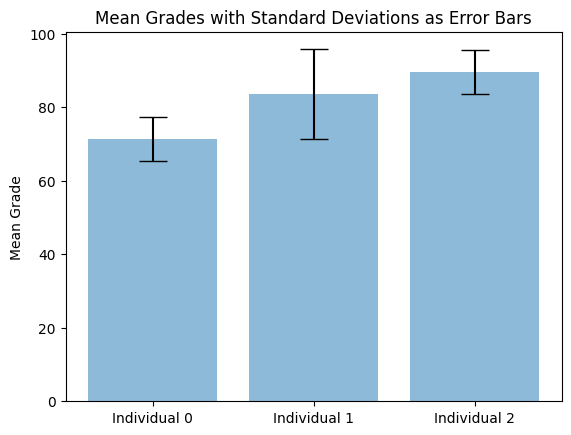

In [ ]:
# prompt: for a list of 3 lists with the same number of elements, generate a bar chart with each sublist as a group and use standard deviations as error bars

import matplotlib.pyplot as plt
import numpy as np

# Assuming grade_lists is defined as in the provided code

# Calculate mean and standard deviation for each list
means = [np.mean(grade_list) for grade_list in grade_lists]
std_devs = [np.std(grade_list) for grade_list in grade_lists]

# Create bar chart with error bars representing standard deviation
x_pos = np.arange(len(grade_lists))
plt.bar(x_pos, means, yerr=std_devs, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.xticks(x_pos, [f"Individual {i}" for i in range(len(grade_lists))])
plt.ylabel('Mean Grade')
plt.title('Mean Grades with Standard Deviations as Error Bars')
plt.show()

> Standard deviation (indcated by the range of the black bars) measures the amount of variation or dispersion of a set of values. 68% of all the data are within 1 standard deviation (as indicated in these graphs) of the mean. 95% are within 1.96 standard deviations.




> As you can see, although individual 1 has higher average than individual 0, they also have a higher variability in their scores. This means that they may not have **significantly** higher scores than individual 0. For one obervation to be **significantly** more than another means that the difference is unlikely due to chance (for exmaple, 2 people may have about the same knowledge about the subject matter, but they may make careless mistakes, or guess a multiple choice right, causing their scores to vary).

### Viusalization 2: Line Charts


A **line chart** can be good to demonstrate change over time or compare different sets of data.

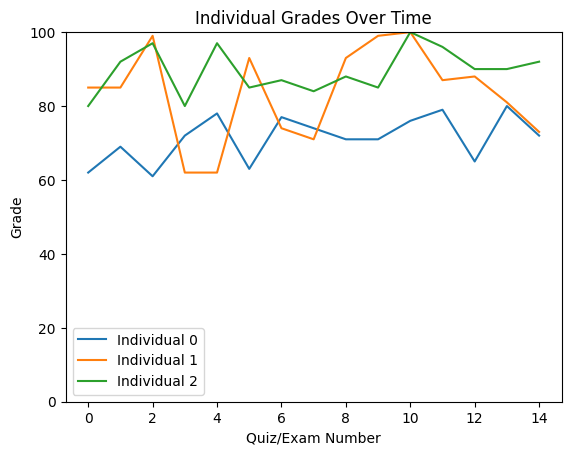

In [ ]:
# prompt: create a line chart that plots each sublist of a list, make the y scale start at 0

import matplotlib.pyplot as plt

# Assuming grade_lists is defined as in the provided code
for i, grades in enumerate(grade_lists):
    plt.plot(grades, label=f'Individual {i}')

plt.xlabel('Quiz/Exam Number')
plt.ylabel('Grade')
plt.title('Individual Grades Over Time')
plt.ylim(0, 100)  # Set y-axis limits to start at 0
plt.legend()
plt.show()

> Off this graph we can interpret a few things:
* The fluctuation/variation of differet sets (for exmaple, the scores of individual 1 varies more than the other 2)
* The general trend of each set (for example. individuals 0 and 2 have an upward trend in general)
* Specific pointwise comparisons (for example, who is doing best at exam 1?)



### Visualization 3: Regressions

You may want to understand if each individual is generally improving or declining in their scores. For this kind of analyses a linear regression may be helpful.

Slope for Individual 0: 0.6714285714285717
Slope for Individual 1: 0.2928571428571445
Slope for Individual 2: 0.39642857142857224


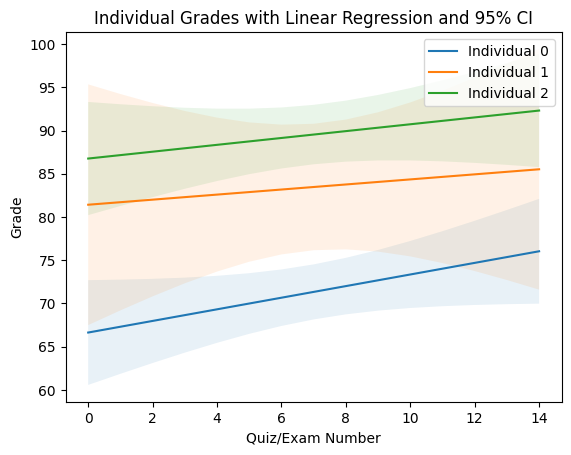

In [ ]:
# prompt: make a regression line for each sublist, color them accordingly, make a 95% confidence interval for each regression

import statsmodels.api as sm

# Assuming grade_lists is defined as in the provided code
for i, grades in enumerate(grade_lists):
    x = np.arange(len(grades))
    y = np.array(grades)
    X = sm.add_constant(x)  # Add a constant for the intercept
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    print(f"Slope for Individual {i}: {model.params[1]}")
    # Calculate 95% confidence interval
    ci = model.get_prediction(X).conf_int(alpha=0.05) #alpha=0.05 for 95% CI

    plt.plot(x, predictions, label=f'Individual {i}')
    plt.fill_between(x, ci[:, 0], ci[:, 1], alpha=0.1) # Plot confidence interval

plt.xlabel('Quiz/Exam Number')
plt.ylabel('Grade')
plt.title('Individual Grades with Linear Regression and 95% CI')
plt.legend()
plt.show()



> The hyperbola-shaped, shaded areas are 95% Confidence intervals, indicating that 95% of the data within the record of each individuals fall into those shades. If the confidence intervals are completely separate from each other (like individuals 0 and 2), it is very likely that the observations from one group (individual 2's test scores) are signiticantly different from the other one.







> by comparing the slopes of the regression lines, we can have a general understanding that individual 0 is improving at the fastest rate, followed by individual 2.



### Significance (Hypothesis) Tests

Significance tests often accompany data visualizations. Oftentimes you would see a p value indicated in the legends, or a little star in the picture. What do those mean?

One of the foundational theories of modern science can be summarized as this: there is no such thing as truth. There are only things that we haven't falsified yet. To make a claim about our data, for example, the claim:
*   Individual 2 has higher avegrages than individual 0

should be **scientifically** expressed as this:

*   we can reject/falsify that the averages of individuals 2 and 0 are equal.

or:

*   the observation that the average of individual 2 has higher averages than individual 0 is highly unlikely caused by chance.

To make such claims we would use **significance tests** (sometimes also called "**hypothesis tests**". They roughly go like this:
*   State a null hypothesis (very often, that the difference between groups **are** due to chance)
*   Calculate the likelyhood of that hypothesis (or the **p-value**)
*   Reject the hypothesis (or fail to do so. some would use the wording "accept the null hypothesis") based on your significance value (or **alpha**. if p is less than alpha, you can reject the null hypothesis, and vice versa.)

> When the difference is significant, oftentimes people will indicate it with an arterisk (\*). The more areterisks there are (\*\*, \*\*\*), the smaller the p-value is, indicating that we are more confident in rejecting the null hypotheiss.


**Let's practice doing some hypothesis testing with the examples above:**









#### t-test


(GenAI content)

A t-test is a statistical test used to determine if there is a significant difference between the means of two groups.  It's commonly used when you have a small sample size and the population standard deviation is unknown.  There are different types of t-tests, including:

* **Independent samples t-test:**  Compares the means of two independent groups.  For example, comparing the average test scores of students who received a new teaching method versus those who received the traditional method.

* **Paired samples t-test:** Compares the means of two related groups.  For example, comparing the average blood pressure of patients *before* and *after* taking a medication.

* **One-sample t-test:** Compares the mean of a single group to a known value. For example, comparing the average height of a group of people to a national average height.

The t-test calculates a t-statistic, which represents the difference between the means of the groups, relative to the variability within each group. This t-statistic is then used to determine a p-value.  The p-value represents the probability of observing the data (or more extreme data) if there were *no real difference* between the group means.

A small p-value (typically less than 0.05) indicates that the observed difference is unlikely to be due to chance alone, and we reject the "null hypothesis" (which states there is no difference).  This suggests that there is a statistically significant difference between the group means.  A large p-value suggests that the observed difference could plausibly be due to random variation, and we fail to reject the null hypothesis.

In our case, we are doing an independent samples t-test

In [ ]:
# prompt: do pairwise t-test for the groups

from scipy import stats

# Assuming grade_lists is defined as in the previous code
# Perform pairwise t-tests
for i in range(len(grade_lists)):
    for j in range(i + 1, len(grade_lists)):
        t_statistic, p_value = stats.ttest_ind(grade_lists[i], grade_lists[j])
        print(f"Pairwise t-test between Individual {i} and Individual {j}:")
        print(f"  t-statistic: {t_statistic}")
        print(f"  p-value: {p_value}")
        alpha = 0.05
        if p_value < alpha:
            print(f"  Reject the null hypothesis: The difference between the groups is statistically significant.\n")
        else:
            print(f"  Fail to reject the null hypothesis: The difference between the groups is not statistically significant.\n")

Pairwise t-test between Individual 0 and Individual 1:
  t-statistic: -3.318664982051956
  p-value: 0.002517341636667936
  Reject the null hypothesis: The difference between the groups is statistically significant.

Pairwise t-test between Individual 0 and Individual 2:
  t-statistic: -7.999317706707514
  p-value: 1.0353103522921487e-08
  Reject the null hypothesis: The difference between the groups is statistically significant.

Pairwise t-test between Individual 1 and Individual 2:
  t-statistic: -1.662771689644159
  p-value: 0.1075139315246538
  Fail to reject the null hypothesis: The difference between the groups is not statistically significant.



#### ANOVA test


(GenAI content)

Where as a t-test is used to compare 2 different observations, an ANOVA (Analysis of Variance) is a statistical test used to compare the means of three or more groups simultaneously.  It determines if there's a statistically significant difference between the means of the groups, or if the observed differences are likely due to random chance.


In [ ]:
# prompt: Do ANOVA for different individuals

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*grade_lists)

print("ANOVA test:")
print(f"  F-statistic: {f_statistic}")
print(f"  p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(f"  Reject the null hypothesis: There is a statistically significant difference between the groups.\n")
else:
    print(f"  Fail to reject the null hypothesis: There is no statistically significant difference between the groups.\n")

ANOVA test:
  F-statistic: 16.175117595471587
  p-value: 6.184517440153913e-06
  Reject the null hypothesis: There is a statistically significant difference between the groups.



> An ANOVA test is usually followed up by post-hoc tests. Post-hoc tests are used after an ANOVA test to determine which specific group means are significantly different from each other. If the ANOVA test shows a significant difference between groups, a post-hoc test helps to pinpoint where those differences lie. For the most basic one, the pairwise t-test that we dod above can be a post hoc test.

> However, when the number of t-tests go up, we are less and less confident to claim that there is a difference across all groups. Think about this: there is a 5% chance that a significant result is actually due to chance. If the numbers cumulate (say we have 5 individuals and 20 pairwise comparisons), we are less and less certain that there is a differece between all groups. Therefore, you may consider using [Bonferroni's test](https://www.investopedia.com/terms/b/bonferroni-test.asp) or [Tukey's HSD](https://www.statology.org/tukey-test-python/). These post-hoc tests try to account for the confidence problem that we mentioned.


#### More tests

There are more kinds of analyses you can do with this data. For example you may want to answer the following question:

*  Arguably, the tests are not all the same. As you move along in the term, for example, you get to know more and more about the subject matter. Time is thus a variable that has an influence on grades. Our question canbe restated as "while controlling for time, is there a significant difference between individuals in their test scores?", In these cases we may want to consider using an [ANCOVA test](https://en.wikipedia.org/wiki/Analysis_of_covariance) to account for that.

All of these tests may sound unreasonable for some, especially if you haven't had experience with statistics before. Here is a systematic way to find out what test you should use:

* Identify you independend variables (IV) and dependent variables (DV). Most often, the null hypothesis states that there is no effect from the independent variables on the dependent variables. In our case, for example, we can state that there is no effect from *which individual it is* (our IV) on *average test scores* (our DV).

* understand the type of your IVs and DVs, as well as how many of them there are. A common typology of data is the division between [nominal, ordinal, discrete, and continuous. ](https://panintelligence.com/blog/types-of-data/#:~:text=The%20different%20types%20of%20data,ordinal%20data%20for%20accurate%20analysis.)

* select a test from the dimensionality of your IVs and DVs. For example, I would search or ask genAI this:
  * I have 1 nominal independent variable (group) and 1 continuous dependent variable (test scores), what test should I use?

You can also reference [repositories/lists of statistical tests](https://www.scribbr.com/statistics/statistical-tests/) for inspirations.

### Other Resources

You may be familiar with the most basic ways of visualiztion, like pie charts, line charts, histograms, scatterplots, maps, etc. [Picking the right way to visualize based on your goal](https://www.tableau.com/learn/whitepapers/which-type-chart-or-graph-right-for-you-ungated)
 (what arguments are you making with this visualization?) is important.


[Small Multiples](https://www.juiceanalytics.com/writing/better-know-visualization-small-multiples) is a way to compare and contrast the same data for different entities. For example you can do:

* [line charts](https://python-graph-gallery.com/125-small-multiples-for-line-chart/)
* pie charts
* colored maps

Here is an example of small multiples with maps:

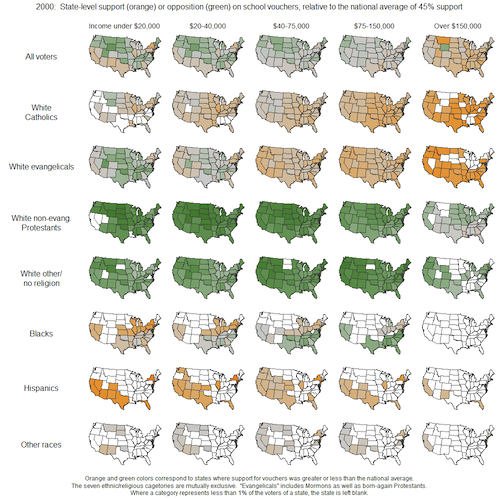



When the data is complicated (I don't think the DataSquad has done anything like this before), you may want to use an [interactive/dynamic data visualization](https://www.geeksforgeeks.org/what-is-interactive-data-visualization/) to allow the user to explore the data. D3.js is a good tool to learn.

[Here is an example interactive visualization that I made in CS 314.](https://observablehq.com/d/6b6db07122ceb46e)

Here are some platforms&packages good for data visualization:
* Tableau
* R (ggplot2, lattice, shiny)
* Python (pyplot, matplotlib, plotly, dash)



## Credits:

Google Gemini was use to generate some basic code and definitional text. These are indicated by a "(GenAI content)" marker (text) or "#prompt: ..." (code) on top of the **cell** generated.

Some data visualiation techniques were taken from Eric Alexander's CS 314: Data Visualization

A lot of the material in "significance tests" was learned from Mija Van Der Wege's class PSYC 200 & 201: Measurement and Analysis

